# 1. Business Requirements

- Mục tiêu: Dự đoán khách hàng có rời bỏ dịch vụ (Churn) hay không
- Ý nghĩa: Giúp doanh nghiệp giữ chân được khách hàng, cải thiện chiến lược kinh doanh, ...
- Dữ liệu: https://www.kaggle.com/datasets/blastchar/telco-customer-churn (Kaggle)
- Target variable: Churn (0: No, 1: Yes)

---

---

# 2. Data Understanding

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv('../data/Telecom_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [87]:
print(f"Dataset size: {df.shape}")    # Kích thước của dữ liệu

Dataset size: (7043, 21)


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [89]:
df.describe()   # Thống kê các thuộc tính dạng numeric

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [90]:
# Kiểm tra dữ liệu có chứa missing data
na = df.isna().sum()
print(f"Missing values:\n{na}")

Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


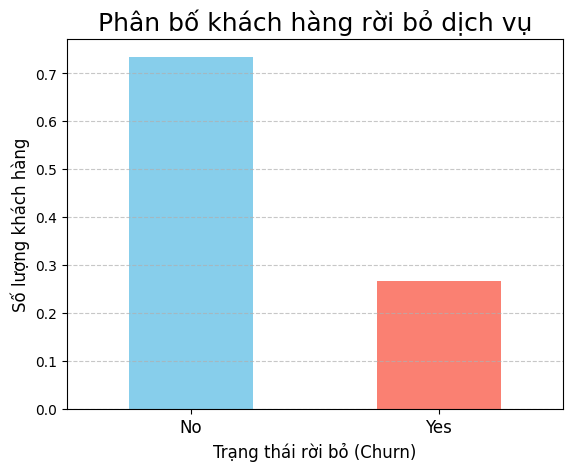

In [91]:
# Tạo df thể hiện số lượng trạng thái khách hàng
df_churn_count = df['Churn'].value_counts()/df.shape[0]

df_churn_count.plot(kind='bar', color=['skyblue', 'salmon'])

# Tiêu đề và nhãn
plt.title('Phân bố khách hàng rời bỏ dịch vụ', fontsize=18)
plt.xlabel('Trạng thái rời bỏ (Churn)', fontsize=12)
plt.ylabel('Số lượng khách hàng', fontsize=12)
plt.xticks(rotation=0, fontsize=12)

# Đường kẻ
plt.grid(axis='y', linestyle='--', alpha=0.7)

---

### Columns Information

* `tenure`: Số tháng sử dụng dịch vụ.
* `PhoneService`: Có dịch vụ điện thoại (`Yes`/`No`).
* `MultipleLines`: Có nhiều đường dây điện thoại (`Yes`/`No`).
* `InternetService`: Loại Internet (`DSL`, `Fiber optic`, `No`).
* `OnlineSecurity`: Dịch vụ bảo mật trực tuyến (`Yes`/`No`).
* `OnlineBackup`: Dịch vụ sao lưu trực tuyến (`Yes`/`No`).
* `DeviceProtection`: Bảo vệ thiết bị (`Yes`/`No`).
* `TechSupport`: Hỗ trợ kỹ thuật (`Yes`/`No`).
* `StreamingTV`: Xem TV trực tuyến (`Yes`/`No`).
* `StreamingMovies`: Xem phim trực tuyến (`Yes`/`No`).
* `Contract`: Loại hợp đồng (`Month-to-month`, `One year`, `Two year`).
* `PaperlessBilling`: Hóa đơn điện tử (`Yes`/`No`).
* `PaymentMethod`: Phương thức thanh toán.
* `MonthlyCharges`: Phí hàng tháng.
* `TotalCharges`: Tổng chi tiêu.
* `Churn` (Label): Rời bỏ dịch vụ (`Yes`/`No`).

---

---

# 3. Data Preprocessing

In [92]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### 3.1.Clean data

In [93]:
cat_df = df.select_dtypes(include=['object'])

for col in cat_df:
    print(f"{col}\n{cat_df[col].unique()}\n")

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender
['Female' 'Male']

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

PhoneService
['No' 'Yes']

MultipleLines
['No phone service' 'No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['No' 'Yes' 'No internet service']

StreamingTV
['No' 'Yes' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

TotalCharges
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

Churn
['No' 'Yes']



In [94]:
import numpy as np
import pandas as pd

# ===================== CLEAN/ ENCODE, TRANSFORM DATA ========================


# 1. Mã hoá cột `Churn` (label)
def encode_churn(df: pd.DataFrame, col_name="Churn"):
    df[col_name] = df[col_name].map({"No": 0, "Yes": 1})  # Chuyển đổi sang dạng binary
    return df


# 2. Mã hoá cột `gender`
def encode_gender(df: pd.DataFrame, col_name="gender"):
    df[col_name] = df[col_name].map(
        {"Male": 0, "Female": 1}
    )  # Chuyển đổi sang dạng binary
    return df


# 3.1 Chuẩn hoá cột `MonthlyCharges`
def clean_monthly_charges(df: pd.DataFrame, col_name="MonthlyCharges"):

    # Ép kiểu từ obj sang float
    df[col_name] = pd.to_numeric(df[col_name], errors="coerce").astype("float64")
    df[col_name] = df[col_name].fillna(df[col_name].median())  # fillna bằng trung vị

    return df


# 3.2 Chuẩn hóa cột `TotalCharges`
def clean_total_charges(df: pd.DataFrame, col_name="TotalCharges"):

    # Ép kiểu từ obj sang float
    df[col_name] = pd.to_numeric(df[col_name], errors="coerce").astype("float64")
    df[col_name] = df[col_name].fillna(df[col_name].median())  # fillna bằng trung vị

    # transform
    df[f"log_{col_name}"] = np.log1p(df[col_name])
    return df


# 4. Xử lý cột `MultipleLines`
def encode_multiple_lines(df: pd.DataFrame, col_name="MultipleLines"):

    # Thay đổi 'No phone service' thành 'No'
    df[col_name] = df[col_name].replace("No phone service", "No")
    
    return df


# 5. Xử lý các cột InternetService
def fix_special_categories(df: pd.DataFrame, col_name: list[str]):

    for col in col_name:
        df[col] = df[col].replace("No internet service", "No")
    return df


# 6. Chuyển đổi Yes/No -> 0/1 cho các cột nhị phân
def encode_category_cols_yn(df: pd.DataFrame):

    # Chuyển đổi thuộc tính có kiểu dữ liệu ['Yes', 'No'] thành binary [0 1]
    yes_no_cols = [col for col in df.columns if df[col].isin(["Yes", "No"]).all()]

    for col in yes_no_cols:
        df[col] = df[col].map({"No": 0, "Yes": 1})
    return df


# 7. Loại bỏ cột không cần thiết
def drop_unused_columns(df: pd.DataFrame, col_name="customerID"):
    return df.drop(columns=col_name)


# 8. Xoá các dữ liệu trùng lập và nan
def drop_duplicate_nan(df: pd.DataFrame):

    df = df.drop_duplicates(
        keep="first"
    )  # Xoá dữ liệu trùng lặp nhưng vẫn giữ lại mẫu đầu tiên
    df = df.dropna(how="any", axis=0)  # Xoá dòng dữ liệu nếu có giá trị bất kì bị thiếu

    return df


# ===================== FEATURE ENGINEERING ========================


# 9. Tạo feature `ChargeRatio`
def create_feature_AvgMonthlySpent(df: pd.DataFrame):
    df["AvgMonthlySpent"] = df["TotalCharges"] / (df["tenure"] + 1)
    return df


def create_feature_tenure_group(df):

    def mask(s):
        if s <= 6:
            return "Very_New"
        elif s <= 12:
            return "New"
        elif s <= 24:
            return "Mid"
        elif s <= 48:
            return "Long"
        else:
            return "Loyal"

    df["tenure_group"] = df["tenure"].apply(mask)
    return df



def create_feature_num_addons(df, internet_cols):
    df["Num_Addons"] = df[internet_cols].sum(axis=1)
    return df


# ===================== PREPROCESSING PIPELINE ========================
def clean_telco_data(df, internet_service_lst):

    # ---- CLEAN ----
    df = clean_monthly_charges(df)
    df = clean_total_charges(df)
    df = encode_multiple_lines(df)
    df = fix_special_categories(df, internet_service_lst)

    # ---- ENCODE----
    df = encode_churn(df, "Churn")
    df = encode_gender(df, "gender")
    df = encode_category_cols_yn(df)

    # ---- FINAL CLEAN ----
    df = drop_unused_columns(df)
    df = drop_duplicate_nan(df)

    # ---- FEATURE ENGINEERING----
    df = create_feature_AvgMonthlySpent(df)
    df = create_feature_tenure_group(df)
    df = create_feature_num_addons(df, internet_service_lst)

    return df


In [95]:
internet_cols = [
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies",
    ]

In [96]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [97]:
# import sys
# sys.path.append("..")  # đi lên 1 cấp đến thư mục root

# from src import preprocessing

In [98]:
df = clean_telco_data(df, internet_cols)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,log_TotalCharges,AvgMonthlySpent,tenure_group,Num_Addons
0,1,0,1,0,1,0,0,DSL,0,1,...,Month-to-month,1,Electronic check,29.85,29.85,0,3.429137,14.925000,Very_New,1
1,0,0,0,0,34,1,0,DSL,1,0,...,One year,0,Mailed check,56.95,1889.50,0,7.544597,53.985714,Long,2
2,0,0,0,0,2,1,0,DSL,1,1,...,Month-to-month,1,Mailed check,53.85,108.15,1,4.692723,36.050000,Very_New,2
3,0,0,0,0,45,0,0,DSL,1,0,...,One year,0,Bank transfer (automatic),42.30,1840.75,0,7.518471,40.016304,Long,3
4,1,0,0,0,2,1,0,Fiber optic,0,0,...,Month-to-month,1,Electronic check,70.70,151.65,1,5.028148,50.550000,Very_New,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,...,One year,1,Mailed check,84.80,1990.50,0,7.596643,79.620000,Mid,5
7039,1,0,1,1,72,1,1,Fiber optic,0,1,...,One year,1,Credit card (automatic),103.20,7362.90,0,8.904345,100.861644,Loyal,4
7040,1,0,1,1,11,0,0,DSL,1,0,...,Month-to-month,1,Electronic check,29.60,346.45,0,5.850621,28.870833,New,1
7041,0,1,1,0,4,1,1,Fiber optic,0,0,...,Month-to-month,1,Mailed check,74.40,306.60,1,5.728800,61.320000,Very_New,0


#### 3.2. Chia nhóm cột

#### 3.3. Chia thành các tập train/test

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

# 1. Feature groups
num_feat = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlySpent']   # continuous
cat_ordinal_feat = ['Contract', 'tenure_group']           # ordinal
cat_onehot_feat = ['InternetService', 'PaymentMethod']    # nominal
binary_feat = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
discrete_feat = ['Num_Addons']                            # do NOT scale

# 2. Correct ordinal order
contract_asc = ['Month-to-month', 'One year', 'Two year']
tenure_group_order = ['Very_New', 'New', 'Mid', 'Long', 'Loyal']


# 3. Correct preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_feat),
        ('cat_ordinal', OrdinalEncoder(categories=[contract_asc, tenure_group_order]), cat_ordinal_feat),
        ('cat_onehot', OneHotEncoder(handle_unknown='ignore'), cat_onehot_feat),
    ],
    remainder='passthrough'      # keeps binary + discrete unchanged
)

# 4. Select correct X, y
feature_cols = num_feat + cat_ordinal_feat + cat_onehot_feat + binary_feat + discrete_feat
X = df[feature_cols]
y = df['Churn']

# 5. Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# 6. Fit only on train
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

---

---

# 4. Modeling

#### 4.1. Init Model

In [100]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    BaggingClassifier
)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

models = {
    # Linear Models
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=2000),
    "SGD Classifier": SGDClassifier(class_weight='balanced'),
    "Perceptron": Perceptron(class_weight='balanced'),

    # Neighbors
    "KNN": KNeighborsClassifier(),

    # Tree models
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Extra Trees": ExtraTreesClassifier(class_weight='balanced'),
    "Bagging": BaggingClassifier(),

    # SVM
    "SVM": SVC(class_weight='balanced', probability=True),

    # Naive Bayes
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB()
}


#### 4.2. Traing và predict

In [101]:
for name, model in models.items():
    model.fit(X_train_preprocessed, y_train)
    print(f'Trained model: {name}')

Trained model: Logistic Regression
Trained model: SGD Classifier
Trained model: Perceptron
Trained model: KNN
Trained model: Decision Tree
Trained model: Random Forest
Trained model: Extra Trees
Trained model: Bagging
Trained model: SVM
Trained model: GaussianNB
Trained model: BernoulliNB


---

---

# 5. Evaluation

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

results = []
lst_y_pred = []
for name, model in models.items():
    y_pred = model.predict(X_test_preprocessed)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    lst_y_pred.append(y_pred)
    results.append([name, acc, prec, rec, f1])

# dataframe kết quả
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
print(df_results.sort_values(by='F1', ascending=False))


                  Model  Accuracy  Precision    Recall        F1
8                   SVM  0.751423   0.495122  0.786822  0.607784
9            GaussianNB  0.757116   0.502551  0.763566  0.606154
0   Logistic Regression  0.744782   0.486998  0.798450  0.604993
10          BernoulliNB  0.774194   0.530303  0.678295  0.595238
1        SGD Classifier  0.767552   0.519174  0.682171  0.589615
5         Random Forest  0.789374   0.583333  0.488372  0.531646
3                   KNN  0.762808   0.516000  0.500000  0.507874
6           Extra Trees  0.771347   0.537445  0.472868  0.503093
2            Perceptron  0.541746   0.341772  0.941860  0.501548
7               Bagging  0.777040   0.555024  0.449612  0.496788
4         Decision Tree  0.726755   0.446429  0.484496  0.464684


###  Ma trận nhầm lẫn

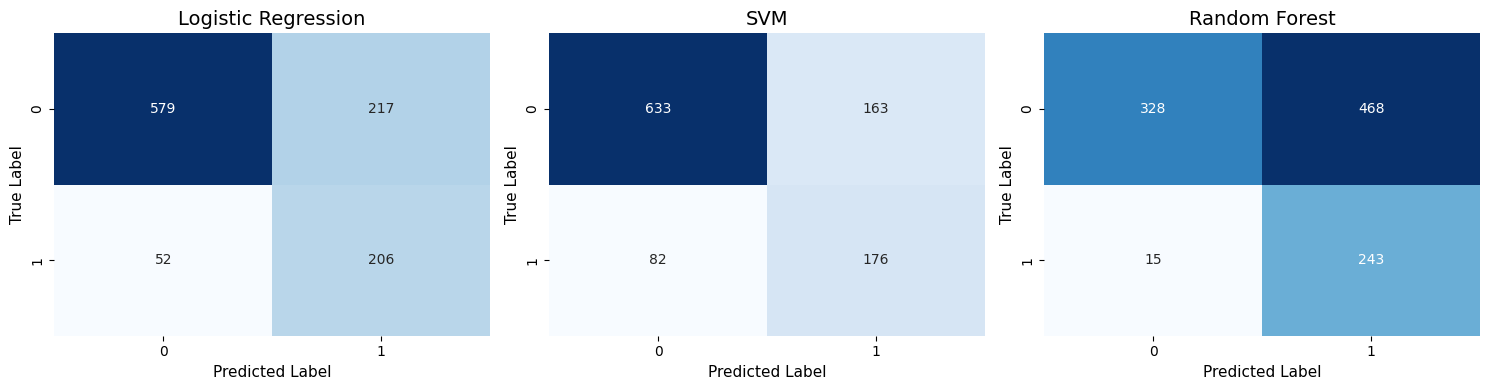

In [103]:
from sklearn.metrics import confusion_matrix

model_names = ['Logistic Regression', 'SVM', 'Random Forest']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, ax in enumerate(axes):
    cm = confusion_matrix(y_test, lst_y_pred[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

    ax.set_title(f'{model_names[i]}', fontsize=14)
    ax.set_xlabel('Predicted Label', fontsize=11)
    ax.set_ylabel('True Label', fontsize=11)

plt.tight_layout()

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier())
])


metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

results = cross_validate(
    pipeline, X, y,
    cv=5,
    scoring=metrics,
    return_train_score=True
)

print("Mean accuracy:", results['test_accuracy'].mean())
print("Mean precision:", results['test_precision_macro'].mean())
print("Mean recall:", results['test_recall_macro'].mean())
print("Mean F1:", results['test_f1_macro'].mean())

Mean accuracy: 0.7893444251807241
Mean precision: 0.7313257007826478
Mean recall: 0.6931595891251863
Mean F1: 0.7068638640800661
